Numerical analysis (or data analysis) is what Python is especially good at.  And it's possibly your reason to learn Python?  Now we will guide you to use Python to analyze data by using a model problem, which is Fourier analysis.

In [1]:
%pylab inline

# Import necessary modules.

import os

import numpy as np
from IPython.display import display, Audio

# Define constants.

sampling_freq = 44100 # 44.1 kHz.
duration = 5 # in sec.

# Define demonstrative helper functions.

def time_data(duration, rate):
    return np.linspace(0, duration, num=rate*duration)

def sine_data(freq, time):
    return 2**13 * np.sin(2*np.pi * freq * time)

def note_freq(note):
    """Parse note symbol "a4", "c4", etc. and calculate frequency (in Hz)."""
    f0 = 440.0 # a4
    note = note.lower()
    diff = {'a': 0, 'b': 2, 'c': -9, 'd': -7, 'e': -5, 'f': -4, 'g': -2}[note[0]]
    diff += {'#': 1, 'b': -1}.get(note[1], 0)
    diff += 12 * (int(note[-1])-4)
    return f0 * 2 ** (float(diff)/12)

def play_notes(*notes):
    time = time_data(duration, sampling_freq)
    alist = [sine_data(note_freq(n), time) for n in notes]
    data = np.vstack(alist).sum(axis=0)
    display(Audio(data.astype('int16'), rate=sampling_freq))
    return time, data

Populating the interactive namespace from numpy and matplotlib


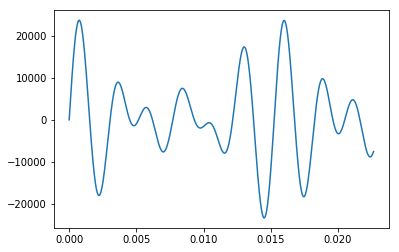

In [2]:
# Show the audio playback.
time_point, data = play_notes('c4', 'e4', 'g4')

# Plot the first 1000 time points (around 25 ms).
plot(time_point[0:1000], data[0:1000])